<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Review" data-toc-modified-id="Data-Review-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Review</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Matrix-multiplication" data-toc-modified-id="Matrix-multiplication-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matrix multiplication</a></span></li><li><span><a href="#Conversion-algorithm" data-toc-modified-id="Conversion-algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conversion algorithm</a></span></li><li><span><a href="#Algorithm-verification" data-toc-modified-id="Algorithm-verification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Algorithm verification</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Protection of personal data of clients

We need to protect the data of customers of the insurance company "ABC". We need to develop a data transformation method that makes it difficult to recover personal information and make sure that it works correctly.

We need to protect the data so that the quality of the machine learning models does not change during the transformation. There is no need to select the best model.

## Data Review

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('insurance.csv')
except: 
    print('Something is wrong')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


So, we have a table with data.

According to the data documentation:

Features:

* Gender
* Age
* Salary of the insured
* Number of family members

Target variable:

* The number of insurance payments to the client for the last 5 years

Let's create histograms to visualize the feature distributions.

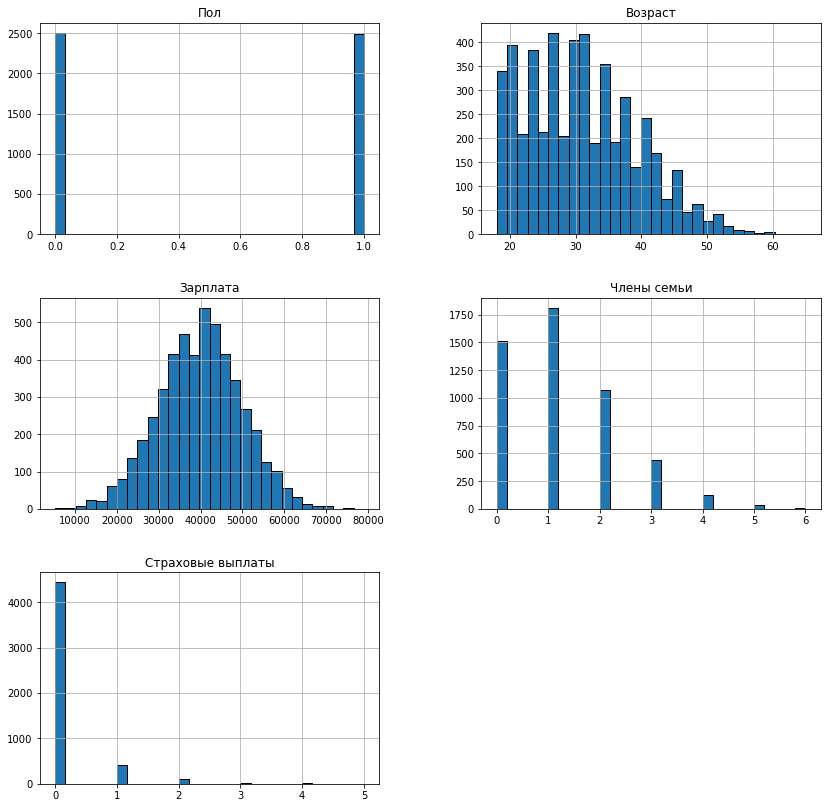

In [6]:
df.hist(bins=30, figsize=(14,14), edgecolor='black', linewidth=1)
plt.show()

The distributions look normal, no anomalies were found. Let's look at the correlations between features.

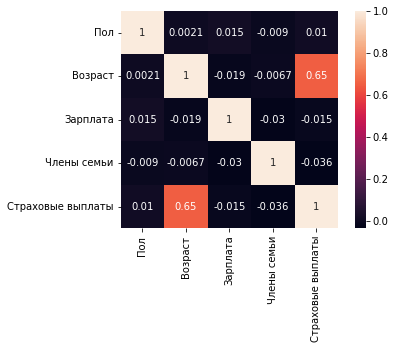

In [7]:
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

There is an moderate positive correlation (0.65) between the age and the amount of insurance payments to the client in the last 5 years.

**Data transformation**

For convenience, we will rename the columns from Russian to English.

In [8]:
df.columns = ['gender', 'age', 'salary', 'family', 'insurance_payments']
df.head()

,gender,age,salary,family,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Let's change the type of the `age` column to integer for the convenience.

In [9]:
df['age'] = df['age'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   salary              5000 non-null   float64
 3   family              5000 non-null   int64  
 4   insurance_payments  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


Let's check the data for duplicate values.

In [11]:
df.duplicated().sum()

153

We have found 153 duplicate values. This is probably due to some technical problem or data entry error. Since the target variable ranges from 0 to 5, it seems unlikely that there could be a complete match for all features of two different clients. Based on this assumption, it would be correct to get rid of duplicate values.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

Thus, we removed 153 duplicate values.

### Conclusion

The data consists of 5000 observations and 5 columns. Each row in the data set is personal information about the clients of the insurance company, as well as the number of insurance payments to the client over the past 5 years.

The data is normally distributed, no missing, anomalies, or outliers were found. There is an moderate positive correlation (0.65) between the age and the number of insurance payments to the client over the last 5 years.

During data preprocessing, we did the following:

* renamed the columns
* removed 153 duplicate values
* changed the type of the `Age` column to integer

## Matrix multiplication

The features are multiplied by an invertible matrix. It is necessary to check whether the quality of the linear regression will change and show how the linear regression parameters are related in the original problem and in the transformed one.

- $X$ - feature matrix (zero column consists of ones)

- $y$ — target feature vector

- $P$ - the matrix by which features are multiplied

- $w$ — vector of linear regression weights (zero element equals to shift)

Predictions:

$$
a = Xw
$$

Learning objective:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

We need to prove that the predictions before the transformation will be equal to the predictions after the transformation.

Now let's check whether the predictions before the transformation **a** are equal to the predictions after the transformation **a'**.

First, let's denote the vector of linear regression weights for the transformed data (multiplied by a random invertible matrix) as **w'**. Let's substitute the matrix **X** multiplied by a random invertible matrix **P** into the formula for calculating **w** and perform the following transformations:

$w' = ((PX)^T(PX))^{-1}(PX)^Ty$

$w' = (P^TX^TPX)^{-1}P^TX^Ty$

$w' = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$

Since the product of a matrix and the inverse gives the identity matrix, we use the formula: $ AA^{-1}=A^{-1}A=E $

$w' = P^{-1}(X^TX)^{-1}EX^Ty$

$w' = P^{-1}(X^TX)^{-1}X^Ty$

Since the right side of the equality $(X^TX)^{-1}X^Ty$ corresponds to the formula for calculating the weight vector **w**, then the equality can be written as:

$w' = P^{-1}w$

Thus:

$a' = PXw' = XPP^{-1}w = XEw = Xw = a$

**Conclusion**

Thus, we have proved that the predictions for the feature matrix multiplied by the invertible matrix are equal to the predictions for the original matrix. Therefore, the quality of the linear regression will not change.

## Conversion algorithm

**Algorithm**

1. Divide the sample into features and target variable
2. Create a random invertible matrix as an encryption key
3. Multiply the feature matrix by the created matrix
4. Train the model on the initial features
5. Train the model on new features
6. Use the R2 metric to compare model predictions
7. Determine if the quality of the linear regression will change

If the algorithm is successful, then we will decrypt the data and compare it with the original ones.

**Explanation**

Since we have proved that the quality of linear regression does not change when the feature matrix is multiplied by any invertible matrix P, we can follow the algorithm described above without fear of obtaining a different result of linear regression.

## Algorithm verification

In [14]:
def shape(X_train, y_train, X_valid, y_valid):
    return (
        print('Features size of training set:', X_train.shape), 
        print('Target size of training set:', y_train.shape), 
        print('Features size of validation set:', X_valid.shape), 
        print('Target size of validation set:', y_valid.shape)
    )

**Data preprocessing**

Let's divide the data into features and a target variable.

In [15]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

In [16]:
print('Features size:',features.shape)
print('Target size:',target.shape)

Features size: (4847, 4)
Target size: (4847,)


**Initial data**

Let's split the data into two sets: training and validation in the proportion of 75/25.

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(
    features,
    target, 
    train_size=0.75, 
    random_state=12345
)

In [18]:
shape(X_train, X_valid, y_train, y_valid)

Features size of training set: (3635, 4)
Target size of training set: (1212, 4)
Features size of validation set: (3635,)
Target size of validation set: (1212,)


(None, None, None, None)

Let's check the linear regression model on the original data.

In [19]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
lr_pred = model_lr.predict(X_valid)
r2 = r2_score(y_valid, lr_pred)
print(f'R2: {r2}')

R2: 0.42307727492147584


**Transformed data**

Let's create a random invertible matrix and multiply the original data by it.

In [20]:
rand_matrix = np.linalg.inv(np.random.rand(4, 4))
features_new = features @ rand_matrix

In [21]:
features_new.head(5)

,0,1,2,3
0,-259961.004390,124248.142952,16463.617818,254840.128726
1,-199058.909125,95129.473465,12605.740721,195178.724390
2,-109989.376776,52559.857612,6966.335733,107852.670248
3,-218622.232624,104502.583220,13840.903900,214289.975734
4,-136762.733793,65359.813334,8663.699384,134080.652717


We will also split the new data into two sets: training and validation in the proportion of 75/25.

In [22]:
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(
    features_new,
    target, 
    train_size=0.75, 
    random_state=12345
)

In [23]:
shape(X_train_new, X_valid_new, y_train_new, y_valid_new)

Features size of training set: (3635, 4)
Target size of training set: (1212, 4)
Features size of validation set: (3635,)
Target size of validation set: (1212,)


(None, None, None, None)

Let's test the linear regression model on new data.

In [24]:
model_lr_new = LinearRegression()
model_lr_new.fit(X_train_new, y_train_new)
lr_pred_new = model_lr_new.predict(X_valid_new)
r2_new = r2_score(y_valid_new, lr_pred_new)
print(f'R2: {r2_new}')

R2: 0.42307727492119107


**Comparison of results**

In [25]:
pd.Series([r2, r2_new], index=['Not encrypted', 'Encrypted']).to_frame('R2')

,R2
Not encrypted,0.423077
Encrypted,0.423077


Thus, verification confirms that the algorithm works as intended. The coefficients of determination for linear regression trained on the original and transformed data are similar.

**Data decryption**

Now let's try to decrypt the encrypted data of the validation set.

First, let's look at the encrypted data.

In [26]:
X_valid_new

,0,1,2,3
1335,-247497.930507,118301.987677,15674.433014,242579.638853
3875,-345550.287010,165170.356825,21883.320917,338685.286154
166,-177630.246433,84896.592660,11248.815055,174145.795125
3003,-100981.929872,48249.481692,6394.056127,99056.870613
424,-143958.288164,68789.577328,9115.666067,141187.581754
...,...,...,...,...
1589,-120441.213387,57553.459793,7629.487199,118107.252664
32,-267366.144896,127798.266644,16930.153706,262072.162304
360,-175565.537889,83916.501703,11116.103898,172108.097116
2862,-173498.919175,82924.442665,10987.081488,170076.872022


Now we decrypt the data by multiplying it by the inverse matrix.

In [27]:
X_valid_decripted = round(X_valid_new @ np.linalg.inv(rand_matrix)).astype('int')
X_valid_decripted.columns = ['gender', 'age', 'salary', 'family']
X_valid_decripted

,gender,age,salary,family
1335,1,23,47200,0
3875,1,32,65900,0
166,1,33,33900,2
3003,0,39,19300,2
424,0,46,27500,2
...,...,...,...,...
1589,1,35,23000,1
32,1,30,51000,2
360,1,26,33500,3
2862,0,25,33100,0


Compare with the original data of the validation set.

In [28]:
X_valid

,gender,age,salary,family
1335,1,23,47200.0,0
3875,1,32,65900.0,0
166,1,33,33900.0,2
3003,0,39,19300.0,2
424,0,46,27500.0,2
...,...,...,...,...
1589,1,35,23000.0,1
32,1,30,51000.0,2
360,1,26,33500.0,3
2862,0,25,33100.0,0


In [29]:
pd.DataFrame(data=((X_valid == X_valid_decripted).count()), columns=['Number of matches'])

,Number of matches
gender,1212
age,1212
salary,1212
family,1212


After the transformation, we received an identical data set to the original one. The algorithm works correctly and encryption does not affect the results of the linear regression model.

## Conclusion

In the course of the project, we examined the data, checked feature distributions, and removed duplicates. We proved that multiplication by a random invertible matrix does not affect the quality of linear regression. We proposed the algorithm for transforming data to solve the problem. We split the data into training and validation sets in the proportion of 75:25. Checked the quality of linear regression on the original data. We encrypted the data by multiplying it by a random invertible matrix and checked the quality of the linear regression on the new data. We compared the results using the R2 metric and tried to decrypt the data.

We managed to create such a data transformation method based on obtaining a random reversible matrix and multiplying it by a matrix of learning features, so that it would be difficult to restore personal information from them. As a result, we managed to distort the data in such a way that it is difficult to recover information from them, but at the same time, the quality of the predictions of the linear regression trained on them does not change.

We also created a method for decrypting data and bringing it back to its original form and tested it.